# MLMC Elliptic Experiments

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
sys.path.append('../..')

import matplotlib.pyplot as plt
from matplotlib import gridspec
import python.mppy as mppy
from python.mluqmppy import plot_results_3x3

mpp = mppy.Mpp(
    kernels=4,
    mute=False,
    executable='M++',
    build_dir='build-mlmc-notebook',
    cmake_args=['-DMPP_BUILD_TYPE=MppRelease', '-DBUILD_UQ=On', '-DBUILD_UQ_TESTS=Off'],
)

In [3]:
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/niklas/CLion/mpp/build-mlmc-notebook
-- PROJECT_SOURCE_DIR= /home/niklas/CLion/mpp
-- PROJECT_MPP_DIR=    /home/niklas/CLion/mpp
-- Option:     BUILD_UQ= On   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1

0

### Introductry example

In [4]:
mpp.reset_data()
mpp.run(4, config="MLMC_elliptic", kwargs={"VtuPlot": 1, "SLEstimatorVerbose": 1, "initLevels": [4, 5, 6], "initSamples": [16, 16, 16], "epsilon": 0.0, "WTime": "00:00:00"})


================ running  mpp ================

start program on 4 procs at Mon Jan 20 18:22:25 2025
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     epsilon: ................................. 0.0
     Estimator: ............................... MultilevelMonteCarlo
     eta: ..................................... 0.8
     GeneratorVerbose: ........................ 0
     initLevels: .............................. [4, 5, 6]
     initSamples: ............................. [16, 16, 16]
     lambda: .................................. [0.15, 0.15]
     LinearVerbose: ........................... 0
     MainVerbose: ............................. 1
     MakeCommunicatorConsistent: .............. 1
     Mean: .................................... 0.0
     MemoryBudget: ............................

0

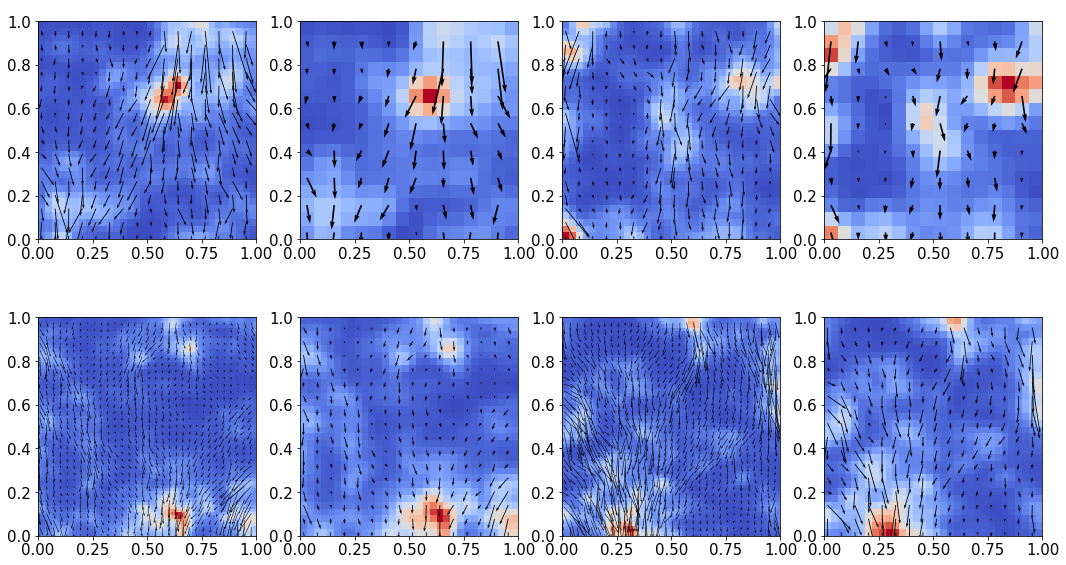

In [5]:
data = mpp.parse_json()
problem_name = data[-1]["Config Info"]["Problem"]
p = mpp.vtu_plot(figsize=(18, 10))
plt.axis('off')
gs = gridspec.GridSpec(2, 4)

p.ax1 = p.fig.add_subplot(gs[0])
p.add_vtu("Kappa.{}.5.0.0.pvtu".format(problem_name), ax=p.ax1, cb=False)
p.add_quivers("Flux.{}.5.0.0.pvtu".format(problem_name), ax=p.ax1)
p.ax2 = p.fig.add_subplot(gs[1])
p.add_vtu("Kappa.{}.5.1.0.pvtu".format(problem_name), ax=p.ax2, cb=False)
p.add_quivers("Flux.{}.5.1.0.pvtu".format(problem_name), ax=p.ax2)
p.ax3 = p.fig.add_subplot(gs[2])
p.add_vtu("Kappa.{}.5.0.1.pvtu".format(problem_name), ax=p.ax3, cb=False)
p.add_quivers("Flux.{}.5.0.1.pvtu".format(problem_name), ax=p.ax3)
p.ax4 = p.fig.add_subplot(gs[3])
p.add_vtu("Kappa.{}.5.1.1.pvtu".format(problem_name), ax=p.ax4, cb=False)
p.add_quivers("Flux.{}.5.1.1.pvtu".format(problem_name), ax=p.ax4)

p.ax5 = p.fig.add_subplot(gs[4])
p.add_vtu("Kappa.{}.6.0.0.pvtu".format(problem_name), ax=p.ax5, cb=False)
p.add_quivers("Flux.{}.6.0.0.pvtu".format(problem_name), ax=p.ax5)
p.ax6 = p.fig.add_subplot(gs[5])
p.add_vtu("Kappa.{}.6.1.0.pvtu".format(problem_name), ax=p.ax6, cb=False)   
p.add_quivers("Flux.{}.6.1.0.pvtu".format(problem_name), ax=p.ax6)

p.ax7 = p.fig.add_subplot(gs[6])
p.add_vtu("Kappa.{}.6.0.1.pvtu".format(problem_name), ax=p.ax7, cb=False)
p.add_quivers("Flux.{}.6.0.1.pvtu".format(problem_name), ax=p.ax7)

p.ax8 = p.fig.add_subplot(gs[7])
p.add_vtu("Kappa.{}.6.1.1.pvtu".format(problem_name), ax=p.ax8, cb=False)
p.add_quivers("Flux.{}.6.1.1.pvtu".format(problem_name), ax=p.ax8)

In [6]:
mpp.reset_data()
mpp.clean_data()
mpp.run(4, config="MLMC_elliptic", kwargs={"VtuPlot": 0, "SLEstimatorVerbose": 1, "initLevels": [3, 4, 5], "initSamples": [256, 64, 32], "WTime": "00:10:00", })


================ running  mpp ================

start program on 4 procs at Mon Jan 20 18:22:27 2025
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     Estimator: ............................... MultilevelMonteCarlo
     eta: ..................................... 0.8
     GeneratorVerbose: ........................ 0
     initLevels: .............................. [3, 4, 5]
     initSamples: ............................. [256, 64, 32]
     lambda: .................................. [0.15, 0.15]
     LinearVerbose: ........................... 0
     MainVerbose: ............................. 1
     MakeCommunicatorConsistent: .............. 1
     Mean: .................................... 0.0
     MemoryBudget: ............................ 30000
     MeshesVerbose: ........................

         ParallelEstimator3: 0.728874105 seconds
         ParallelEstimator4: dM=160 dMcomm=40 commSplit=2 maxSamplesByMem=5764 M=316
         ParallelEstimator4: 0.112377477 seconds
         ParallelEstimator5: dM=32 dMcomm=8 commSplit=2 maxSamplesByMem=848 M=68
         ParallelEstimator5: 0.096980623 seconds
       LevelLoop: Objective=E(L2(forward)) | alpha=-0.10222817 beta=2.5260129 gammaCT=2.0998787 gammaMem=2.6972541
       LevelLoop: epsilon=0.00042538642 rmse=0.00029468405 | mse=8.6838692e-08 sam=8.6838692e-08 num=0
       LevelLoop: cost_time=2.7077543 cost_mem_total=196.79297 cost_mem_sum=33.007812 mem_offset=163.78516
       LevelLoop: timeCost/timeBudget=0.0045129238 memoCost/memoBudget=0.0093710938 
       LevelLoop: 0.939508252 seconds
     BudgetedMultiLevelEstimator: dM=[5524, 212, 40] | epsilon=0.00034030913
     BudgetedMultiLevelEstimator: Estimation round i=7
       LevelLoop: Start with expected time 1.3572971 seconds, and expected memory 196.79297 Mbyte
         

         ParallelEstimator3: 25.963716226 seconds
         ParallelEstimator4: dM=5408 dMcomm=1352 commSplit=2 maxSamplesByMem=210 M=9864
         ParallelEstimator4: 3.923941796 seconds
         ParallelEstimator5: dM=1244 dMcomm=311 commSplit=2 maxSamplesByMem=122 M=2124
         ParallelEstimator5: 3.657925298 seconds
       LevelLoop: Objective=E(L2(forward)) | alpha=0.15615435 beta=2.3117553 gammaCT=2.0125858 gammaMem=0.50238198
       LevelLoop: epsilon=7.1367998e-05 rmse=0.0010907127 | mse=1.1896541e-06 sam=2.5486089e-09 num=1.1871055e-06
       LevelLoop: cost_time=93.005456 cost_mem_total=570.81641 cost_mem_sum=407.03125 mem_offset=163.78516
       LevelLoop: timeCost/timeBudget=0.15500909 memoCost/memoBudget=0.027181734 
       LevelLoop: 33.546979324 seconds
     BudgetedMultiLevelEstimator: Appended level=6 with dM=1188 | epsilon=5.7094398e-05
       LevelLoop: Start with expected time 0 seconds, and expected memory 570.81641 Mbyte
         ParallelEstimator6: dM=1188 dMcom

     RMSE(L2(∆forward)): ...................... [0.00561237, 0.0040637, 0.00525425, 0.00269043, 0.0484428, 0.00173501, 0.00139157, 0.00115445, 0.000943193, 0.00074232, 0.00325972, 0.00159778, 0.00221529, 0.00131855, 0.000852668, 0.000290266, 0.000289915, 0.000188319, 0.000199947]
     MSE(L2(∆forward)): ....................... [3.14987e-05, 1.65137e-05, 2.76071e-05, 7.2384e-06, 0.00234671, 3.01028e-06, 1.93647e-06, 1.33276e-06, 8.89614e-07, 5.51038e-07, 1.06258e-05, 2.55291e-06, 4.90749e-06, 1.73858e-06, 7.27042e-07, 8.42542e-08, 8.40509e-08, 3.54641e-08, 3.99786e-08]
     NUM(L2(∆forward)): ....................... [3.61582e-06, 3.61582e-06, 1.82264e-05, 0, 0.00234205, 0, 0, 0, 0, 0, 1.02821e-05, 2.3268e-06, 4.76336e-06, 1.64623e-06, 6.67814e-07, 1.49686e-08, 7.50579e-09, 8.44975e-09, 7.78578e-09]
     SAM(L2(∆forward)): ....................... [2.78829e-05, 1.28979e-05, 9.38075e-06, 7.2384e-06, 4.66001e-06, 3.01028e-06, 1.93647e-06, 1.33276e-06, 8.89614e-07, 5.51038e-07, 3.43698e-07, 

0

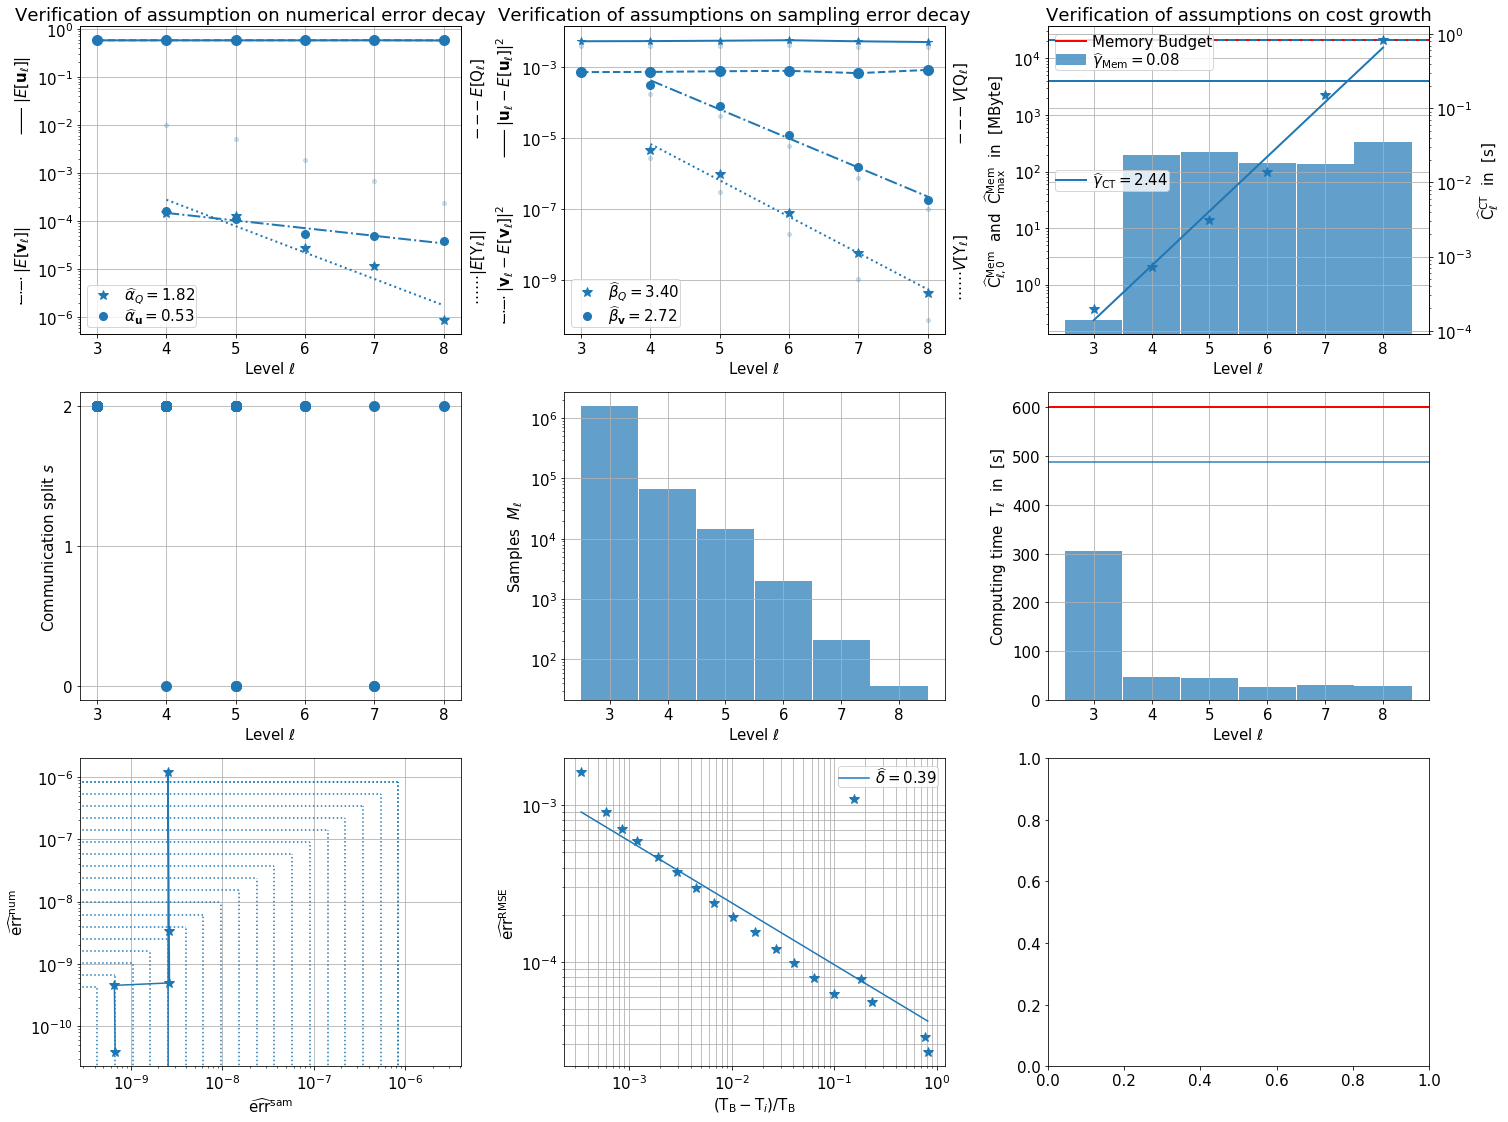

In [7]:
data = mpp.parse_json()
plot_results_3x3(mpp)

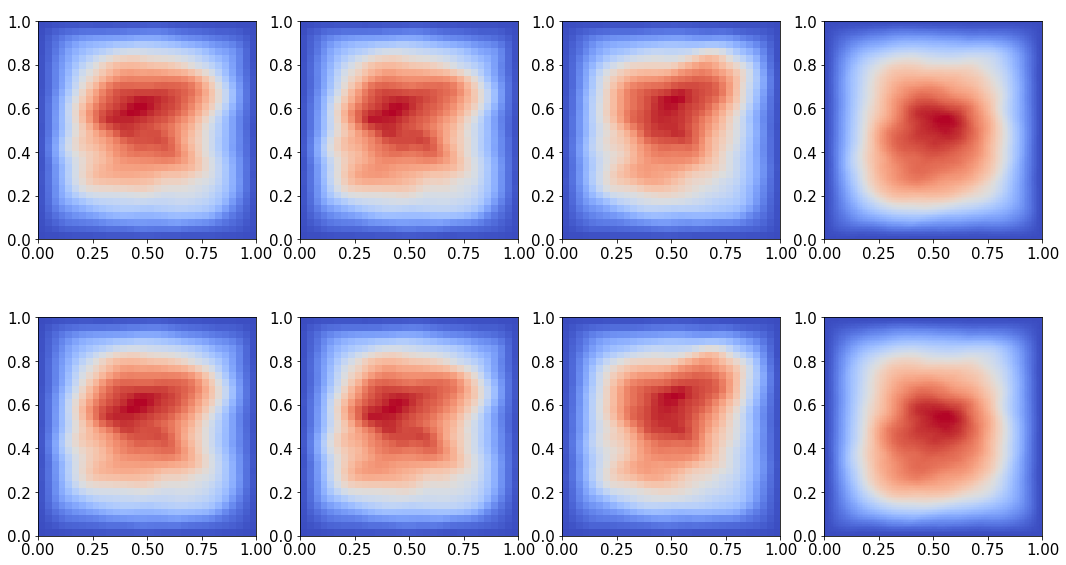

In [8]:
p = mpp.vtu_plot(figsize=(18, 10))
plt.axis('off')
gs = gridspec.GridSpec(2, 4)

p.ax1 = p.fig.add_subplot(gs[0])
p.add_vtu("Estimates.0.pvtu", ax=p.ax1, cb=False)
p.ax2 = p.fig.add_subplot(gs[1])
p.add_vtu("Estimates.2.pvtu", ax=p.ax2, cb=False)
p.ax3 = p.fig.add_subplot(gs[2])
p.add_vtu("Estimates.4.pvtu", ax=p.ax3, cb=False)
p.ax4 = p.fig.add_subplot(gs[3])
p.add_vtu("Estimates.16.pvtu", ax=p.ax4, cb=False)

p.ax5 = p.fig.add_subplot(gs[4])
p.add_vtu("Estimates.0.pvtu", ax=p.ax5, cb=False)
p.ax6 = p.fig.add_subplot(gs[5])
p.add_vtu("Estimates.2.pvtu", ax=p.ax6, cb=False)
p.ax7 = p.fig.add_subplot(gs[6])
p.add_vtu("Estimates.4.pvtu", ax=p.ax7, cb=False)
p.ax8 = p.fig.add_subplot(gs[7])
p.add_vtu("Estimates.16.pvtu", ax=p.ax8, cb=False)


In [9]:
mpp.reset_data()
mpp.clean_data()
mpp.run(4, config="MLMC_elliptic", kwargs={"Problem": "EllipticDarcyLogNormalSPDE2D", "nu": 21, "VtuPlot": 1, "SLEstimatorVerbose": 1, "initLevels": [4, 5, 6], "initSamples": [16, 16, 16], "epsilon": 0.0, "WTime": "00:00:00"})


================ running  mpp ================

start program on 4 procs at Mon Jan 20 18:30:40 2025
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     epsilon: ................................. 0.0
     Estimator: ............................... MultilevelMonteCarlo
     eta: ..................................... 0.8
     GeneratorVerbose: ........................ 0
     initLevels: .............................. [4, 5, 6]
     initSamples: ............................. [16, 16, 16]
     lambda: .................................. [0.15, 0.15]
     LinearVerbose: ........................... 0
     MainVerbose: ............................. 1
     MakeCommunicatorConsistent: .............. 1
     Mean: .................................... 0.0
     MemoryBudget: ............................

0

In [10]:
#data = mpp.parse_json()
#problem_name = data[-1]["Config Info"]["Problem"]
#p = mpp.vtu_plot(figsize=(18, 10))
#plt.axis('off')
#gs = gridspec.GridSpec(2, 4)
#
#p.ax1 = p.fig.add_subplot(gs[0])
#p.add_vtu("Kappa.SPDE.{}.5.0.0.0.pvtu".format(problem_name), ax=p.ax1, cb=False)
#p.add_quivers("Flux.SPDE.{}.5.0.0.0.pvtu".format(problem_name), ax=p.ax1)
#p.ax2 = p.fig.add_subplot(gs[1])
#p.add_vtu("Kappa.SPDE.{}.5.0.1.0.pvtu".format(problem_name), ax=p.ax2, cb=False)
#p.add_quivers("Flux.SPDE.{}.5.0.1.0.pvtu".format(problem_name), ax=p.ax2)
#p.ax3 = p.fig.add_subplot(gs[2])
#p.add_vtu("Kappa.SPDE.{}.5.0.0.1.pvtu".format(problem_name), ax=p.ax3, cb=False)
#p.add_quivers("Flux.SPDE.{}.5.0.0.1.pvtu".format(problem_name), ax=p.ax3)
#p.ax4 = p.fig.add_subplot(gs[3])
#p.add_vtu("Kappa.SPDE.{}.5.0.1.1.pvtu".format(problem_name), ax=p.ax4, cb=False)
#p.add_quivers("Flux.SPDE.{}.5.0.1.1.pvtu".format(problem_name), ax=p.ax4)
#
#p.ax5 = p.fig.add_subplot(gs[4])
#p.add_vtu("Kappa.SPDE.{}.6.0.0.0.pvtu".format(problem_name), ax=p.ax5, cb=False)
#p.add_quivers("Flux.SPDE.{}.6.0.0.0.pvtu".format(problem_name), ax=p.ax5)
#p.ax6 = p.fig.add_subplot(gs[5])
#p.add_vtu("Kappa.SPDE.{}.6.0.1.0.pvtu".format(problem_name), ax=p.ax6, cb=False)   
#p.add_quivers("Flux.SPDE.{}.6.0.1.0.pvtu".format(problem_name), ax=p.ax6)
#
#p.ax7 = p.fig.add_subplot(gs[6])
#p.add_vtu("Kappa.SPDE.{}.6.0.0.1.pvtu".format(problem_name), ax=p.ax7, cb=False)
#p.add_quivers("Flux.SPDE.{}.6.0.0.1.pvtu".format(problem_name), ax=p.ax7)
#
#p.ax8 = p.fig.add_subplot(gs[7])
#p.add_vtu("Kappa.SPDE.{}.6.0.1.1.pvtu".format(problem_name), ax=p.ax8, cb=False)
#p.add_quivers("Flux.SPDE.{}.6.0.1.1.pvtu".format(problem_name), ax=p.ax8)